In [3]:
#Нейро-нечеткие системы
#Лабораторная работа №2

#Задача: кластеризация данных

In [4]:
from IPython.core.display import display
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Select, interactive,  Layout, Box, Label
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [5]:
#поиск всех файлов в папке
files = []
for file in os.listdir("."):
    if file.endswith('.csv'):
        files.append(file) 
        
if len(files) != 0:

    fileselect = Select(
        options=files,
        value=files[0],
        description='Select file:',
        disabled=False
    )
fileselect

Select(description='Select file:', options=('test.csv',), value='test.csv')

In [6]:
df = pd.read_csv(fileselect.value, delimiter=",")
df.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


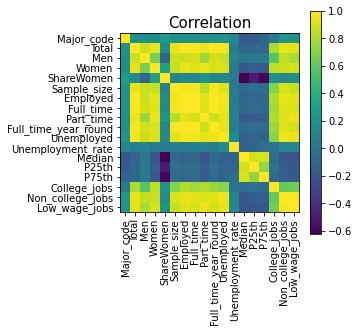

In [7]:
#корреляция 
df = df.fillna(0)
df = df.drop('Rank', 1)
corr = df.corr()
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title("Correlation", fontsize=15)
plt.show()

In [8]:
ddf = df.select_dtypes(include=['number'])
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Первая колонка'), Select(
    options=list(ddf.columns),
    disabled=False
)], layout=form_item_layout),
    Box([Label(value='Вторая колонка'), Select(
    options=list(ddf.columns),
    disabled=False
)], layout=form_item_layout),
    Box([Label(value='Третья колонка'), Select(
    options=list(ddf.columns),
    disabled=False
)], layout=form_item_layout),
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))

In [9]:
form

Box(children=(Box(children=(Label(value='Первая колонка'), Select(options=('Major_code', 'Total', 'Men', 'Wome…

In [10]:
def MakeNClusters(n):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    left = form.children[0].children[1].value
    middle = form.children[1].children[1].value
    right = form.children[2].children[1].value
    print("Clusters: {} {} {}".format(form.children[0].children[1].value, form.children[1].children[1].value, form.children[2].children[1].value))
    X = ddf[[left, middle, right]].values
    X = StandardScaler().fit_transform(X)
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit(X)
    ax.scatter(X[:,0], X[:,1], X[:,2], c= kmeans.labels_.astype(float))
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='red')
    plt.title('Количество кластеров: %d' % n)
    plt.show()

In [11]:
interactive_plot = interactive(MakeNClusters, n=(2, 10))
display(interactive_plot)

interactive(children=(IntSlider(value=6, description='n', max=10, min=2), Output()), _dom_classes=('widget-int…

In [12]:
def MakeDBSCAN(eps):
    left = form.children[0].children[1].value
    right = form.children[1].children[1].value
    X = StandardScaler().fit_transform(df[[left, right]].values)
    db = DBSCAN(eps=eps, min_samples=10).fit(X)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Количество кластеров: %d' % n_clusters_)
    plt.show()

In [13]:
interactive_plot = interactive(MakeDBSCAN, eps=(0.1, 1.0))
display(interactive_plot)

interactive(children=(FloatSlider(value=0.55, description='eps', max=1.0, min=0.1), Output()), _dom_classes=('…

In [14]:
form

Box(children=(Box(children=(Label(value='Первая колонка'), Select(options=('Major_code', 'Total', 'Men', 'Wome…

In [15]:
def MeanShift(bd):
    left = form.children[0].children[1].value
    right = form.children[1].children[1].value
    X = StandardScaler().fit_transform(df[[left, right]].values)
    ms = cluster.MeanShift(bandwidth=bd, bin_seeding=True)
    ms.fit(X)

    cluster_centers_indices = ms.cluster_centers_
    n_clusters_ = len(cluster_centers_indices)
    labels = ms.labels_

    cluster_centers = ms.cluster_centers_

    for k in range(n_clusters_):
        my_members = labels == k
        cluster_center = cluster_centers[k]
        plt.plot(X[my_members, 0], X[my_members, 1])
        plt.plot(cluster_center[0], cluster_center[1], '*', markeredgecolor='k', markersize=10)
    plt.title('Количество кластеров: %d' % n_clusters_)
    plt.show()

In [16]:
interactive_plot = interactive(MeanShift, bd=(0.1, 5))
display(interactive_plot)

interactive(children=(FloatSlider(value=2.5500000000000003, description='bd', max=5.0, min=0.1), Output()), _d…